<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка дубликатов</a></span></li><li><span><a href="#Корреляция-признаков" data-toc-modified-id="Корреляция-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Корреляция признаков</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Ключевые-значения" data-toc-modified-id="Ключевые-значения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ключевые значения</a></span></li><li><span><a href="#Средний-запас-сырья-по-регионам" data-toc-modified-id="Средний-запас-сырья-по-регионам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Средний запас сырья по регионам</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Расчет-прибыли-каждого-региона" data-toc-modified-id="Расчет-прибыли-каждого-региона-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчет прибыли каждого региона</a></span></li><li><span><a href="#Расчет-рисков-каждого-региона" data-toc-modified-id="Расчет-рисков-каждого-региона-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчет рисков каждого региона</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Выбор локации для скважины

## Загрузка и подготовка данных

### Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
data_0.info()
data_0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_1.info()
data_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
data_2.info()
data_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


**Вывод**  

Предоставлены пробы нефти в трёх регионах. В каждой таблице присутствует:
* id — уникальный идентификатор скважины
* f0, f1, f2 — три признака точек 
* product — объём запасов в скважине (тыс. баррелей)  

Пропусков в данных не обнаружено.

### Предобработка данных

In [6]:
data_0 = data_0.drop(['id'], axis=1)
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)

In [7]:
data_0.sample(n=3, random_state=123)

,f0,f1,f2,product
42083,0.331011,-0.288668,6.134432,145.825972
71825,-0.027196,0.189525,0.160777,134.020212
99535,-0.982324,0.286965,-2.163846,88.905826


In [8]:
data_1.sample(n=3, random_state=123)

,f0,f1,f2,product
42083,-1.622009,-11.690538,2.000389,57.085625
71825,7.232615,-7.351703,2.998801,80.859783
99535,10.460238,-15.592718,2.003102,53.906522


In [9]:
data_2.sample(n=3, random_state=123)

,f0,f1,f2,product
42083,0.711582,3.831002,2.352651,147.451978
71825,-0.098114,0.839851,7.261075,128.711794
99535,-0.818925,3.542305,-0.095631,106.628185


**Вывод**

Во всех трех таблицах удален столбец id, так как он не понадобится для дальнейшего построения модели и анализа.

### Проверка дубликатов

In [10]:
print('Количество дубликатов в нулевом датасете:', data_0.duplicated().sum())
print('Количество дубликатов в первом датасете:', data_1.duplicated().sum())
print('Количество дубликатов во втором датасете:', data_2.duplicated().sum())

Количество дубликатов в нулевом датасете: 0
Количество дубликатов в первом датасете: 0
Количество дубликатов во втором датасете: 0


**Вывод**

Дубликатов не найдено.

### Корреляция признаков

In [11]:
data_0.name = "data_0"
data_1.name = "data_1"
data_2.name = "data_2"

In [12]:
def corr_plot(data):
    plt.figure(figsize=(8, 4))
    sns.heatmap(data.corr(method='pearson'), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')
    plt.title('Корреляция признаков ' + data.name)
    plt.show()

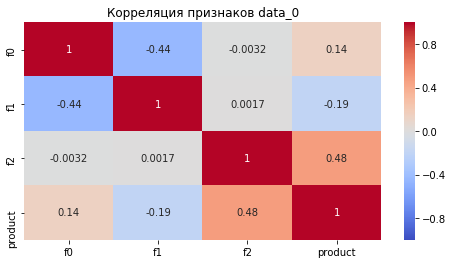

In [13]:
corr_plot(data_0)

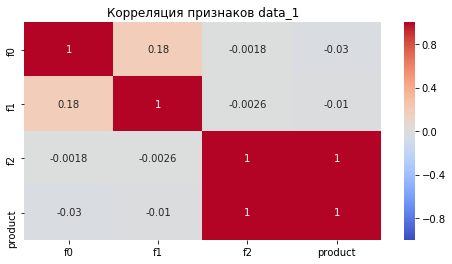

In [14]:
corr_plot(data_1)

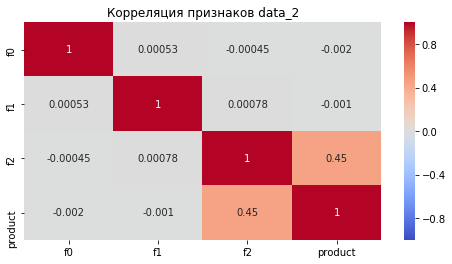

In [15]:
corr_plot(data_2)

**Вывод**

Во всех трех регионах присутствует высокая корреляция между точкой f2 и количеством продукта.  

В описании данных не указанно что именно значат эти точки, но указано что они значимы. Удаление значений может негативно сказаться на последующем анализе.

## Обучение и проверка модели

In [16]:
def train_model(data):
    target = data['product']
    features = data.drop('product', axis=1)
    
    features_train, features_valid, target_train, target_valid = train_test_split(\
                                features, target, test_size=0.25, random_state=12345)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    dict_valid = {'target_valid' : target_valid,
                  'predicted_valid' : predicted_valid}
    df_valid = pd.DataFrame(data=dict_valid)
    
    predicted_valid_mean = predicted_valid.mean()
    RMSE = mean_squared_error(target_valid, predicted_valid) ** 0.5
    
    return df_valid, predicted_valid_mean, RMSE

In [17]:
df_valid_data_0, predicted_valid_mean_data_0, RMSE_data_0 = train_model(data_0)

print('data_0')
print('Средний запас:', predicted_valid_mean_data_0)
print('RMSE:', RMSE_data_0)

data_0
Средний запас: 92.59256778438038
RMSE: 37.5794217150813


In [18]:
df_valid_data_1, predicted_valid_mean_data_1, RMSE_data_1 = train_model(data_1)

print('data_1')
print('Средний запас:', predicted_valid_mean_data_1)
print('RMSE:', RMSE_data_1)

data_1
Средний запас: 68.728546895446
RMSE: 0.893099286775616


In [19]:
df_valid_data_2, predicted_valid_mean_data_2, RMSE_data_2 = train_model(data_2)

print('data_2')
print('Средний запас:', predicted_valid_mean_data_2)
print('RMSE:', RMSE_data_2)

data_2
Средний запас: 94.96504596800489
RMSE: 40.02970873393434


**Вывод**

Максимальный средний запас в регионе data_2, но в этом же регионе максимальное значение RMSE.  
Минимальный средний запас в регионе data_1, в этом же регионе минимальное значение RMSE.

## Подготовка к расчёту прибыли

### Ключевые значения

In [20]:
POINTS_ALL = 500            #при разведке региона исследуют 500 точек
POINTS_SELECT = 200         #200 лучших точек для разработки

BUDGET_FOR_REGION = 1e+10   #бюджет на разработку скважин в регионе — 10 млрд рублей
BARREL_ONE = 450                #один баррель сырья приносит 450 рублей
BARREL_INCOME = 450000             #доход с каждой единицы продукта 450 тыс. рублей, объём указан в тысячах баррелей
LOSS = 2.5                #вероятность убытков меньше 2.5% в регионе

*Расчет достаточного объёма сырья для безубыточной разработки новой скважины*

In [21]:
capacity_for_new = (BUDGET_FOR_REGION / BARREL_INCOME) / POINTS_SELECT
print('Объём сырья для безубыточной разработки новой скважины:', capacity_for_new)

Объём сырья для безубыточной разработки новой скважины: 111.11111111111111


### Средний запас сырья по регионам

In [22]:
print('Средний запас сырья в data_0:', data_0['product'].mean())
print('Средний запас сырья в data_1:', data_1['product'].mean())
print('Средний запас сырья в data_2:', data_2['product'].mean())

Средний запас сырья в data_0: 92.50000000000001
Средний запас сырья в data_1: 68.82500000000002
Средний запас сырья в data_2: 95.00000000000004


In [23]:
d_0 = data_0['product'].describe()
d_1 = data_1['product'].describe()
d_2 = data_2['product'].describe()

desc_table = pd.concat([d_0, d_1, d_2], keys=['data_0', 'data_1', 'data_2'], axis=1)
desc_table

,data_0,data_1,data_2
count,100000.000000,100000.000000,100000.000000
mean,92.500000,68.825000,95.000000
std,44.288691,45.944423,44.749921
min,0.000000,0.000000,0.000000
25%,56.497507,26.953261,59.450441
50%,91.849972,57.085625,94.925613
75%,128.564089,107.813044,130.595027
max,185.364347,137.945408,190.029838


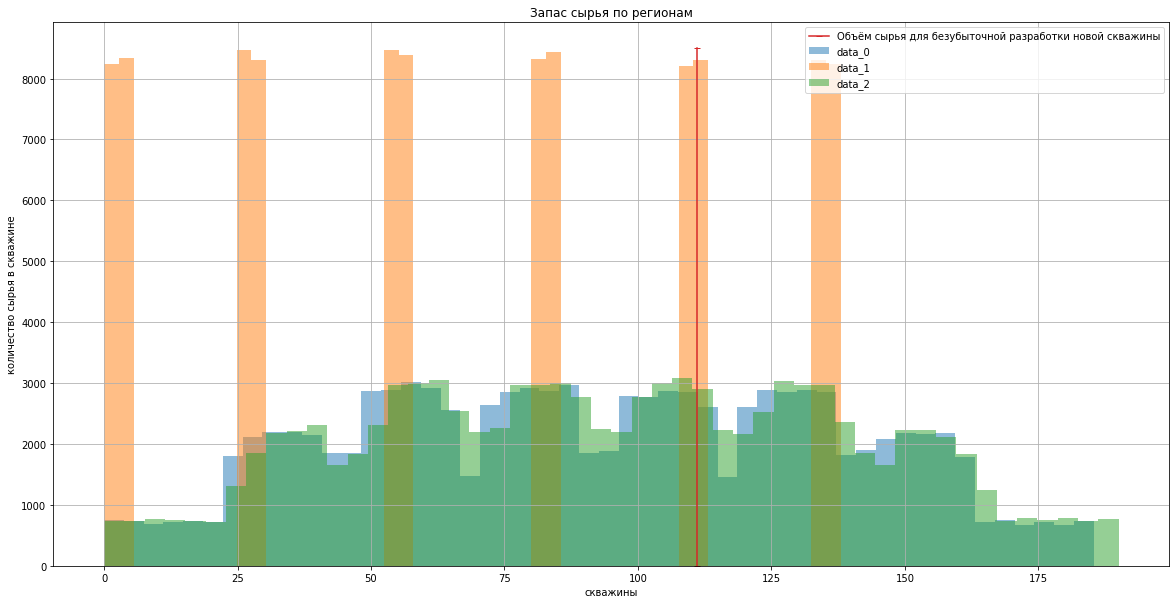

In [24]:
plt.figure(figsize=(20,10))

data_0['product'].hist(bins=50, alpha=0.5)
data_1['product'].hist(bins=50, alpha=0.5)
data_2['product'].hist(bins=50, alpha=0.5)
x1, y1 = [111.111, 111.111], [0, 8500]
plt.plot(x1, y1, marker = '_')

plt.title('Запас сырья по регионам')
plt.ylabel('количество сырья в скважине')
plt.xlabel('скважины')
plt.legend(['Объём сырья для безубыточной разработки новой скважины', 'data_0','data_1', 'data_2'])
plt.show()

**Вывод**

Средний запас сырья в трех выбранных регионах ниже необходимого среднего запаса для безубыточной разработки новой скважины.  
В регионах data_0 и data_2 общий запас выше, чем в регионе data_1.

## Расчёт прибыли и рисков 

### Расчет прибыли каждого региона

In [25]:
def profit(target_valid, predicted_valid):
    probs_sorted = predicted_valid.sort_values(ascending=False)
    selected = target_valid[probs_sorted.index][:POINTS_SELECT]
    return (selected.sum() * BARREL_INCOME) - BUDGET_FOR_REGION

In [26]:
profit_data_0 = profit(df_valid_data_0['target_valid'], df_valid_data_0['predicted_valid'])
print('Прибыль в регионе data_0:', profit_data_0 / 1e+9, 'млрд. рублей.')

Прибыль в регионе data_0: 3.3208260431398524 млрд. рублей.


In [27]:
profit_data_1 = profit(df_valid_data_1['target_valid'], df_valid_data_1['predicted_valid'])
print('Прибыль в регионе data_1:', profit_data_1 / 1e+9, 'млрд. рублей.')

Прибыль в регионе data_1: 2.4150866966815108 млрд. рублей.


In [28]:
profit_data_2 = profit(df_valid_data_2['target_valid'], df_valid_data_2['predicted_valid'])
print('Прибыль в регионе data_2:', profit_data_2 / 1e+9, 'млрд. рублей.')

Прибыль в регионе data_2: 2.7103499635998327 млрд. рублей.


**Вывод**

Возможная максимальная прибыль в регионе data_0.

### Расчет рисков каждого региона

In [29]:
state = np.random.RandomState(12345)

def bootstrap(target_valid, predicted_valid):
    values = []
    
    for i in range(1000):
        target_subsample = target_valid.sample(n=POINTS_ALL, replace=True, random_state=state)
        probs_subsample = predicted_valid[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample))
    values = pd.Series(values)

    mean_val = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    
    pos_risk = stats.percentileofscore(values, 0)
    
    print("Средняя выручка:", mean_val)
    print("95%-й доверительный интервал от:", lower, "до", upper)
    print("Риск убытков", pos_risk, "%")
    
    return mean_val, lower, upper, pos_risk

In [30]:
mean_val_data_0, lower_data_0, upper_data_0, pos_risk_data_0 = bootstrap(
    df_valid_data_0['target_valid'], df_valid_data_0['predicted_valid'])

Средняя выручка: 425938526.9105923
95%-й доверительный интервал от: -102090094.83793654 до 947976353.358369
Риск убытков 6.0 %


In [31]:
mean_val_data_1, lower_data_1, upper_data_1, pos_risk_data_1 = bootstrap(
    df_valid_data_1['target_valid'], df_valid_data_1['predicted_valid'])

Средняя выручка: 518259493.69732493
95%-й доверительный интервал от: 128123231.43308629 до 953612982.0669085
Риск убытков 0.3 %


In [32]:
mean_val_data_2, lower_data_2, upper_data_2, pos_risk_data_2 = bootstrap(
    df_valid_data_2['target_valid'], df_valid_data_2['predicted_valid'])

Средняя выручка: 420194005.34405005
95%-й доверительный интервал от: -115852609.16001143 до 989629939.844574
Риск убытков 6.2 %


**Вывод**

Для разработки нового региона риск убытков должен составлять менее 2,5%. Подходит только регион data_1.

## Общий вывод

In [33]:
overall = pd.DataFrame({
    'Регион': [data_0.name, data_1.name, data_2.name],
    'Средний запас сырья': [data_0['product'].mean(), data_1['product'].mean(), data_2['product'].mean()],
    'Прибыль': [profit_data_0, profit_data_1, profit_data_2],
    'Средняя выручка': [mean_val_data_0, mean_val_data_1, mean_val_data_2],
    'Ниж. довер. инт.': [lower_data_0, lower_data_1, lower_data_2],
    'Верх. довер. инт.': [upper_data_0, upper_data_1, upper_data_2],
    'Риск убытков': [pos_risk_data_0, pos_risk_data_1, pos_risk_data_2], })
overall

,Регион,Средний запас сырья,Прибыль,Средняя выручка,Ниж. довер. инт.,Верх. довер. инт.,Риск убытков
0,data_0,92.500,3.320826e+09,4.259385e+08,-1.020901e+08,9.479764e+08,6.0
1,data_1,68.825,2.415087e+09,5.182595e+08,1.281232e+08,9.536130e+08,0.3
2,data_2,95.000,2.710350e+09,4.201940e+08,-1.158526e+08,9.896299e+08,6.2


**Вывод**

Для разработки подходит регион data_1, так как риск убытков составляет 0,3%, что меньше, чем 2,5%

Самым прибыльным регионом является data_1, однако риск убытков составляет 6%.